In [1]:
import os
import numpy as np 
import pandas as pd
pd.set_option('display.max_colwidth', None) ## 레코드의 모든 값을 보기 위한 설정(text안짤리게)
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
import sqlite3

# 4.3 데이터 준비: 레딧 셀프포스트

In [2]:
print(os.getcwd())
print(os.listdir('../dataset/RedditSelfPosts/'))
# os.chdir('../dataset/RedditSelfPosts/')
# print(os.listdir())
# os.chdir('../../TextAnalysis/')
# print(os.getcwd())

D:\user\Desktop\DataScience_git\TextAnalysis
['rspct.tsv', 'subreddit_info.csv']


In [3]:
dir='../dataset/RedditSelfPosts/'
posts_file = 'rspct.tsv'
posts_df=pd.read_csv(dir+posts_file, sep='\t')
posts_df.info() ## 사용자들의 게시글. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013000 entries, 0 to 1012999
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   id         1013000 non-null  object
 1   subreddit  1013000 non-null  object
 2   title      1013000 non-null  object
 3   selftext   1013000 non-null  object
dtypes: object(4)
memory usage: 30.9+ MB


In [4]:
subred_file='subreddit_info.csv'
subred_df=pd.read_csv(dir+subred_file).set_index(['subreddit'])
subred_df.info() ## subreddit 이라는 커뮤니키에 대한 정보들. 프라이머리키는 subreddit.

<class 'pandas.core.frame.DataFrame'>
Index: 3394 entries, whatsthatbook to Glitch_in_the_Matrix
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   category_1            3394 non-null   object
 1   category_2            3362 non-null   object
 2   category_3            536 non-null    object
 3   in_data               3394 non-null   bool  
 4   reason_for_exclusion  2381 non-null   object
dtypes: bool(1), object(4)
memory usage: 135.9+ KB


In [5]:
df=posts_df.join(subred_df, on='subreddit')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013000 entries, 0 to 1012999
Data columns (total 9 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   id                    1013000 non-null  object
 1   subreddit             1013000 non-null  object
 2   title                 1013000 non-null  object
 3   selftext              1013000 non-null  object
 4   category_1            1013000 non-null  object
 5   category_2            1013000 non-null  object
 6   category_3            136000 non-null   object
 7   in_data               1013000 non-null  bool  
 8   reason_for_exclusion  0 non-null        object
dtypes: bool(1), object(8)
memory usage: 62.8+ MB


## EDA

In [6]:
display(df.sample(5))

,id,subreddit,title,selftext,category_1,category_2,category_3,in_data,reason_for_exclusion
800860,8mlkaz,lucifer,Will a pickup happen or not?,"So it’s been two weeks now and we have the double header of two unaired episodes, but not much news other than “the fight isn’t over” and “conversations are happening”. What is everyone honest take on this now? <lb><lb>I have a few ideas on what is going on with Lucifer. Either the talks are happening, but there is a road block somewhere either with the WB licensing fee, contracts, budgets not coming together. Another possible thought is they are picked up and just not saying anything due to FOX having the two unaired episodes (not sure if they can legally get another network/streaming service to sign contacts with these unaired eps). <lb><lb>I have a feeling that if we don’t hear anything by the weeks end then the fight is over. I know Tom has said he will tell us and I am sure he will, but I doubt like everyone keeps saying that the ratings for Monday are a deciding factor. Networks and streaming services know the fan base is there. The ratings aren’t going to magically jump on Monday. There is more then the ratings at play here. <lb><lb>Thoughts anyone?",tv_show,lucifer,NaN,True,NaN
678899,5m5kn2,SCREENPRINTING,Screen burning services? Have you used them? What was your experience?,"I'll try to avoid getting too mired in unnecessary details here but-- I've got a project in mind that involves the use of a silk screen to pull fiber etch/devore paste through and create burnout textiles on silk/rayon velvet and satin. I don't own silk screen/screen burning equipment and I really just would like to test that this will work the way I want it to before dropping a couple hundred on equipment.<lb><lb>That being said, it's come to my attention that there are a couple of online screen burning services. I did call around and ask a couple of local screen printing shops, but they didn't really seem super thrilled about the idea. Anyone used one of these guys, and wanna give me the scoop on what you liked/did not like from them?",arts,screen printing,NaN,True,NaN
49671,4y42f4,Saxophonics,Help me chose an alto sax etude for an audition please,I'm auditioning for a Jazz band in September and it calls for a Classical Etude or Study. I'm self taught and mostly play jazz so I don't own any classical books and have been playing for 2 years. Does anyone know of any resources or specific Etudes I could play for this audition?,music,saxophone,NaN,True,NaN
732031,6i955a,Herpes,Thank you from a newbie,"I just wanted to make a post saying thank you to everyone who has posted on this topic so far. You are an absolute lifesaver for those of us who are new to this. <lb><lb>I went to the doctors today and she confirmed that it is most likely herpes. Still waiting to hear back on 1 or 2 (G) but thanks to these forums I knew to also ask for a blood test to find out if I've had it for a while or just got infected. <lb><lb>I hope to post a longer story later when I have more results, but for now I just wanted to express my gratitude to everyone on here for making me realize that I am still a human.",health,herpes,NaN,True,NaN
924865,59bx2j,schizophrenia,Only one episode of psychosis?,"Does anyone have the same experience as me? I had one month long lasting psychosis 2 years ago and i havent really had any positive symptoms ever since. Been using abilify regulary. Doc says i have lot of negative symptoms but im not sure if i agree fully.<lb><lb>So my real question is how do function overall? Do you have job, do you, study, have friends, partner etc. eg do you think having only one episode of psychosis is a sign of good prognosis?",health,schizophrenia,NaN,True,NaN


In [7]:
df[['subreddit','category_1','category_2','category_3']].value_counts()

subreddit        category_1   category_2            category_3
ASUS             electronics  laptop/notebook       asus          1000
obs              software     video streaming       obs           1000
korea            geo          korea                 country       1000
lebanon          geo          lebanon               country       1000
linuxquestions   software     unix/unix-like        linux         1000
                                                                  ... 
ShieldAndroidTV  electronics  television            shield tv     1000
SCCM             software     infrastructure        SCCM          1000
Roll20           software     tabletop emulator     roll20        1000
Roku             electronics  digital media player  roku          1000
ynab             software     budgeting             ynab          1000
Name: count, Length: 136, dtype: int64

In [8]:
df['category_1'].unique()

array(['writing/stories', 'tv_show', 'autos', 'hardware/tools',
       'electronics', 'video_game', 'crypto', 'sports', 'hobby',
       'appearance', 'card_game', 'drugs', 'advice/question',
       'social_group', 'anime/manga', 'sex/relationships', 'software',
       'health', 'other', 'animals', 'arts', 'programming', 'rpg',
       'books', 'parenting', 'education', 'company/website', 'profession',
       'music', 'politics/viewpoint', 'stem', 'travel', 'geo',
       'religion/supernatural', 'board_game', 'movies', 'food/drink',
       'finance/money', 'meta'], dtype=object)

In [9]:
df['category_2'].unique()

array(['tech support', 'teen mom', 'harley davidson', ..., 'halo',
       'grand theft auto', 'mead'], dtype=object)

In [10]:
df['category_3'].unique()

array([nan, 'intel', 'oculus rift', 'garmin', 'sharepoint', 'gamestop',
       'uber', 'cloud9', 'microsoft', 'country', 'home assistant', 'tor',
       'hue', 'costco', 'taco bell', 'movie pass club', 'snapchat',
       'excel', 'synology', 'dji', 'wacom', 'sony', 'obs', 'nest',
       'vmware', 'knife club', 'starbucks', 'android auto', 'tinder',
       'valve', 'magento', 'roku', 'autohotkey', 'solidworks', 'thinkpad',
       'premiere', 'ynab', 'corsair', 'spacex', 'unreal', 'windows',
       'lineage os', 'cemu', 'amazon', 'adobe illustrator', 'discord',
       'mac os', 'pfsense', 'postmates', 'outlook', 'arduino', 'sonarr',
       'verizon', 'instacart', 'google', 'criterion', 'shield tv',
       'roll20', 'nvidia', 'tableau', 'samsung', 'word press', 'origin',
       'boosted', 'tasker', 'onenote', 'lime technology', 'cisco',
       'crossfit', 'if then then that', 'nintendo', 'kodi', 'homelab',
       'audible', 'u block', 'walmart', 'airbnb', 'home depot', 'swift',
       'ki

In [11]:
df.isna().sum()

id                            0
subreddit                     0
title                         0
selftext                      0
category_1                    0
category_2                    0
category_3               877000
in_data                       0
reason_for_exclusion    1013000
dtype: int64

## 컬럼(속성) 표준화
- 1. 사용하지 않을 컬럼과 사용할 컬럼으로 나눈다.
  2. 사용할 컬럼의 이름을 일반적인 컬럼명으로 변경해주고, 사용하지 않을 컬럼의 이름에는 None을 붙인다.
  3. 사용하지 않을 컬럼을 삭제한다.
- 목적: 100만건의 데이터는 너무 방대하므로, 카테고리가 "autos"인 데이터 2만건만 추출해낸다.

In [12]:
df.columns

Index(['id', 'subreddit', 'title', 'selftext', 'category_1', 'category_2',
       'category_3', 'in_data', 'reason_for_exclusion'],
      dtype='object')

In [13]:
df.columns=['id', 'subreddit', 'title', 'text', 'category', 'subcategory',
            None, None, None] 
# 필요 없는 카테고리3, 인데이터, 배제사유 날려버리기
df=df.drop([col for col in df.columns if col==None],axis=1)

In [14]:
display(df.sample(1).T)

,738916
id,63yrwl
subreddit,seedboxes
title,"Moving to Germany, should I ditch Hetzner?"
text,"So, I'm moving from the US to Germany at the end of next month. I've been using a Hetzner dedi for the last three years or so, but I'm pretty sure I've seen rumblings around here that using a German company to pirate in Germany is a bad idea.<lb><lb>Should I switch to a dedi hosted somewhere else? I'd hate to, because my Hetzner box is set up perfectly, never gives me any trouble, and has a shit ton of storage. But my husband is military (hence the move), and getting caught breaking German law might not go over so well (i.e. it'd be a disaster with lasting consequences). For sure the safest practice would be to not pirate content while overseas, but LOL NOPE not gonna happen. So how do I best protect us?<lb><lb>Of note, I use FTP with SSL, so everything I download to the home server is fully encrypted, and I use private trackers exclusively. Still, can't be too careful, and I'm looking for any input or advice.<lb><lb>Also of note: there will definitely be PLEX streaming from wherever the data is stored to Germany, because it'll probably take a couple months for our stuff to find it's way to where we are. Does streaming in any way increase our risks?"
category,electronics
subcategory,seedbox


In [15]:
## "autos" category 추출
df = df[df['category']=='autos']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, 2 to 1012979
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           20000 non-null  object
 1   subreddit    20000 non-null  object
 2   title        20000 non-null  object
 3   text         20000 non-null  object
 4   category     20000 non-null  object
 5   subcategory  20000 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


## sqlite3 : autos 데이터프레임 SQL DB로 저장하기
- 피클은 파이썬에서만 사용할 수 있다.
- 데이터프레임은 SQL의 이점을 이용할 수 있으므로, SQL Lite으로 저장한다.

- - 아래는 df.to_sql 함수의 주요 파라미터들입니다. 
- 1. name: DataFrame을 쓸 SQL 테이블의 이름입니다.
  2. con: SQLAlchemy 연결 객체입니다. 데이터베이스 연결 정보를 설정합니다.
  3. schema: 테이블의 스키마 이름 (기본값은 None).
  4. if_exists: 테이블이 이미 존재할 경우의 동작을 지정합니다. 옵션으로는 'fail' (기본값, 테이블이 이미 존재하면 실패), 'replace' (테이블을 덮어씀), 'append' (테이블에 추가)이 있습니다.
  5. index: DataFrame의 인덱스를 데이터베이스 테이블의 인덱스로 사용할지 여부를 지정합니다 (기본값은 True).
  6. index_label: 인덱스 열의 이름을 지정합니다.
  7. chunksize: 한 번에 쓰는 레코드 수를 지정합니다.
  8. dtype: 열의 데이터 유형을 지정합니다.
  9. method: 데이터를 쓰는 방법을 지정합니다.방법을 지정합니다.

In [16]:
## 저장
import sqlite3
save_dir="../output/"
db_name="reddit-selfposts.db"
con=sqlite3.connect(save_dir+db_name)
df.to_sql("posts", con, index=False, if_exists='replace')

20000

In [17]:
## 읽기
save_dir="../output/"
db_name="reddit-selfposts.db"
con=sqlite3.connect(save_dir+db_name)
df=pd.read_sql("select * from posts", con)
con.close()

In [18]:
df

,id,subreddit,title,text,category,subcategory
0,8f73s7,Harley,No Club Colors,"Funny story. I went to college in Las Vegas. This was before I knew anything about motorcycling whatsoever. Me and some college buddies would always go out on the strip to the dance clubs. We always ended up at a bar called Hogs &amp; Heifers. It's worth noting the females working there can outdrink ANYONE. Anyway, there was a sign on the front door that read 'No Club Colors'. So we lose our ties and blazers before heading there. Also we assumed bright colors like red, yellow, green etc were not allowed. So we would always bring an xtra t-shirt and pair of jeans. This went on for years! Looking back now on how naive we were, it's just hilarious. I was never able to walk out of that bar....had to crawl out! So much booze. <lb><lb>Cheers. Ride safe, boys!",autos,harley davidson
1,5s0q8r,Mustang,Roush vs Shleby GT500,"I am trying to determine which is faster, and I've seen the dealership video with the two racing(Roush won 2/3). But I was wondering if it was just because of the bigass supercharger in the Roush. <lb><lb><lb>Also I can't find the same specs on any two websites, what are some trustworthy sources for this kind of thing?",autos,ford
2,5z3405,Volkswagen,2001 Golf Wagon looking for some insight,"Hello! <lb><lb>Trying to find some information on replacing a 2001 Golf Wagon starter (gas).... mine's gone out and going to the dealership is quite out of the range right now. Nor is it in the biggest of rushes. <lb><lb>I live in Japan, and I'm wondering if anyone had any international shipping websites they could recommend and if they had any direction on how to replace it as manuals are oh-so-specific (and not to mention, in Japanese). TIA",autos,VW
3,7df18v,Lexus,IS 250 Coolant Flush/Change,https://www.cars.com/articles/how-often-should-i-change-engine-coolant-1420680853669/<lb><lb>I have a IS 250 AWD from 2006. About 73K miles on it. I've never touched the engine radiator coolant and can't find anything on when to change this in the book. It just says 'long life 100k Toyota coolant.' <lb><lb>Does anyone get this flushed or changed at ten years?? Do I wait until 100k?,autos,lexus
4,5tpve8,volt,Gen1 mpg w/ dead battery?,"Hi, new to this subreddit. I'm considering buying a Gen1 Volt, but I can't find any straight answers as to what kind of mpg it gets after the battery is completely dead (say I take a 300 mile trip). What kind of highway mpg does the Gen1 volt get after the battery is depleted?",autos,chevrolet
...,...,...,...,...,...,...
19995,7i2k6y,4Runner,Bilstein Shocks,"I read a lot Forums and people recommend getting TUNDRA Bilstein Shocks for a 3rd gen 4 runner, what is the difference? and why do they recommend that? I bought Springs tundra Springs for the front and 1997 landcruiser springs fro the rear now I just need shocks. <lb>Thank you",autos,toyota
19996,83p2kv,Harley,Question on potential purchase of crashed bike.,"I am thinking about buying a 2010 Harley Sportster 1200 custom for $6k with 7k miles. It has Vance radius pipes, t bars, screaming eagle filters, sissy bar, new seat and either a new tank or a new paint job as it does not say Harley Davidson on the tank anywhere but has pin stripes.. the title it’s clean but it just seems to good to be true and the sales man has no record of it being in a accident or not. The Title has been transferred to 5 different owners (can not see prices) I really want this bike but I’m skeptical. Any ideas or tips to look for?",autos,harley davidson
19997,7x722h,volt,Got our first warning light on our dash,"My husband and I were headed somewhere and I was cold. So, I figured I could turn the car on before he unplugged it. When it turned on it was fine. Then he got into the drivers seat ten seconds later and we got a ""check charging system"" any suggestions? I figure I messed it up by turning it on before unplugging it *facepalm*",autos,chevrolet
19998,7v2xmg,Lexus,Any IS models to avoid?,"I am lookin

# 4.4 텍스트 데이터 정리

## 정규표현식: 노이즈 식별 - impurity 함수

In [19]:
text="""
I am looking at getting a used Lexus IS (2014 model year and newer). 
Are there any trim levels that I should avoid? 
Thinking about getting a 250, however, I might spend a little bit more and get a 350 if there is a significant performance increase, 
but I wanted to know if there is anything I should know about the lineup before I pull the trigger. 
I am really liking the white exterior and red interior combo.
"""

In [20]:
import re
RE_SUSPICIOUS =re.compile(r'[&#<>{}\[\]\\]')

def impurity(text, min_len=10):
    """텍스트에서 의심스러운 문자의 비율을 반환한다."""
    if text == None or len(text) < min_len:
        return 0
    else: 
        return len(RE_SUSPICIOUS.findall(text))/len(text)

print(impurity(text))

0.0


In [21]:
text="""
After viewing the [PINKIEPOOL Trailer](https://www.youtube.com/watch?v=ieRouHUg) it got me thinking about the best match ups. <lb> Here's my take: <lb><lb>[](/ppseesyou) Deadpool<lb>[](\sp)[](/ajsly) Captain America <\lb>
"""
print(impurity(text))

0.08968609865470852


In [22]:
# 데이터프레임에 새로운 컬럼 추가
df['impurity']= df['text'].apply(impurity, min_len=10)

# 상위 3개 레코드 확인
pd.set_option('display.max_colwidth', 100)
df[['text','impurity']].sort_values(by='impurity', ascending=False).head(3)

,text,impurity
19682,Looking at buying a 335i with 39k miles and 11 months left on the CPO warranty. I asked the deal...,0.214716
12357,I'm looking to lease an a4 premium plus automatic with the nav package.<lb><lb>Vehicle Price:<ta...,0.165099
2730,Breakdown below:<lb><lb>Elantra GT<lb><lb>2.0L 4-cylinder<lb><lb>6-speed Manual Transmission<lb>...,0.139130


In [23]:
# from blueprints.exploration import count_words
# count_words(df, column='text', preprocess= lambda t: re.findall(r'<[\w/]*>',t))
## 블루프린트 없음..

# from blueprints.exploration import count_words
# count_words(df, column='text', preprocess=lambda t: re.findall(r'<[\w/]*>', t))

In [24]:
impurity_set=set()
for l in df['text'].apply(lambda t: re.findall(r'<[\w/]*>',t)).values:
    impurity_set|=set(l)
print(impurity_set)

{'<lb>', '<tab>'}


## 정규표현식: 노이즈 제거 - clean() 함수

In [25]:
import html

def clean(text):
    # &amp;와 같은 html 이스케이프를 문자로 변환한다.
    text=html.unescape(text)
    # print(text)
    # <tab>, <lb>과 같은 태그를 공백으로 변환한다.
    text=re.sub('<[^<>&]*>', ' ', text)
    # print(text)
    # [Some text](https://....)과 같은 마크다운 URL을 공백으로 변환한다.
    # text=re.sub(r'\[([^\[\]]*)\]([^\(\)]*\)', r'\1', text)
    text = re.sub('\[([^\[\]]*)\]\([^\(\)]*\)', r'\1', text)
    # print(text)
    # [0]과 같은 괄호안의 텍스트 또는 코드를 공백으로 변환한다.
    text=re.sub(r'\[[^\[\]]*\]', ' ', text)
    # print(text)
    # 특수 문자로만 구성된 문자열을 공백으로 변환한다. 이때 &#은 변환되지만 #cool은 변환되지 않는다.
    text=re.sub(r'(?:^|\s)[&#<>{}\[\]+|\\:-]{1,}(?:\s|$)', ' ', text)
    # print(text)
    # --- 또는 == 같은 하이픈으로 이뤄진 문자열을 공백으로 변환한다.
    text=re.sub(r'(?:^|\s)[\-=\+]{2,}(?:\s|$)', ' ', text)
    # print(text)
    # 연속된 공백을 공백 하나로 변환한다.
    text=re.sub('\s+', ' ', text)

    return text.strip()
    
clean_text=clean(text)
print(clean_text)
print(impurity(clean_text))

After viewing the PINKIEPOOL Trailer it got me thinking about the best match ups. Here's my take: Deadpool Captain America
0.0


In [26]:
df['clean_text']=df['text'].map(clean)
df['impurity']=df['clean_text'].map(impurity)
df[['clean_text','impurity']].sort_values(by='impurity', ascending=False).head(3)

,clean_text,impurity
14058,"Mustang 2018, 2019, or 2020? Must Haves!! 1. Have a Credit score of 780\+ for the best low inter...",0.030864
18934,"At the dealership, they offered an option for foot-well illumination, but I cannot find any refe...",0.026455
16505,"I am looking at four Caymans, all are in a similar price range. The major differences are the mi...",0.024631


## textacy: 문자 정규화 - normalize, replace, remove
- 텍스트 전처리(정규화)에 특화된 라이브러리
- 함수
- - 1) normalize.hyphenated_words: 줄바꿈으로 구분된 단어를 다시 조합한다.
    2) normalize.quotation_marks: 모든 종류의 따옴표를 아스키 코드에 해당하는 곧은 따옴표로 대체한다.
    3) normalize.unicode: 유니코드에서 악센트가 있는 문자를 다른 코드로 변경한다.
    4) normalize.accents: 가능한 경우 악센트가 있는 문자를 ASCII로 바꾸거나 삭제한다.
    5) replace.urls: https://xyz.com과 같은 URL을 _URL_로 대체한다.
    6) replace.emails: 이메일을 _EMAILS_로 대체한다.
    7) replace.hashtags: #sunshine과 같은 해시태그를 _TAG_로 대체한다.
    8) replace.numbers: 12345와 같은 숫자 패턴을 _NUMBER_로 대체한다.
    9) replace.phon_numbers: 전화번호 패턴을 _PHONE_으로 대체한다.
    10) replace.user_handles: @peter와 같은 사용자명을 _USER_로 대체한다.
    11) replace.emojis: 스마일리와 같은 이모지를 _EMOJI_로 대체한다.
- https://textacy.readthedocs.io/en/latest/

In [27]:
import textacy.preprocessing as tprep

def normalize(text):
    text=tprep.normalize.hyphenated_words(text)
    text=tprep.normalize.quotation_marks(text)
    text=tprep.normalize.unicode(text)
    text=tprep.remove.accents(text)

    return(text)


In [28]:
text="The café “Saint-Raphaël” is loca-\nted on Côte dʼAzur."
print(normalize(text))

The cafe "Saint-Raphael" is located on Cote d'Azur.


## textacy: 데이터 마스킹 - resources

In [29]:
from textacy.preprocessing.resources import RE_URL

# df['clean_text'].apply(lambda x: RE_URL.findall(x))
urls=df['clean_text'].map(RE_URL.findall).values
urls_list=[]
for u in urls.tolist():
    if len(u)>1:
        urls_list.extend(u)
print(urls_list[:5])
print(len(urls_list))



['https://www.nrdc.org/experts/luke-tonachel/new-york-state-enacts-electric-vehicle-consumer-rebate-program', 'https://www.nysenate.gov/legislation', 'http://www.vectoroffroad.com/jke-dock-2007-2010-p-28.html!,', 'http://www.morris4x4center.com/rugged-ridge-cb-radio-dash-mounting-bracket-13551-09.html!', 'https://www.thingiverse.com/thing:912478']
1152


In [30]:
text="check this url change "+urls_list[101]
print(text)

print(tprep.replace.urls(text))

check this url change http://i.imgur.com/lcr0MZW.jpg
check this url change _URL_


In [31]:
df.rename(columns={'text':'raw_text', 'clean_text':'text'}, inplace=True)
df.drop(columns=['impurity'], inplace=True)

In [32]:
con=sqlite3.connect(save_dir+db_name)
df.to_sql("posts_cleaned", con, index=False, if_exists="replace")
con.close()

In [33]:
df

,id,subreddit,title,raw_text,category,subcategory,text
0,8f73s7,Harley,No Club Colors,Funny story. I went to college in Las Vegas. This was before I knew anything about motorcycling ...,autos,harley davidson,Funny story. I went to college in Las Vegas. This was before I knew anything about motorcycling ...
1,5s0q8r,Mustang,Roush vs Shleby GT500,"I am trying to determine which is faster, and I've seen the dealership video with the two racing...",autos,ford,"I am trying to determine which is faster, and I've seen the dealership video with the two racing..."
2,5z3405,Volkswagen,2001 Golf Wagon looking for some insight,Hello! <lb><lb>Trying to find some information on replacing a 2001 Golf Wagon starter (gas).... ...,autos,VW,Hello! Trying to find some information on replacing a 2001 Golf Wagon starter (gas).... mine's g...
3,7df18v,Lexus,IS 250 Coolant Flush/Change,https://www.cars.com/articles/how-often-should-i-change-engine-coolant-1420680853669/<lb><lb>I h...,autos,lexus,https://www.cars.com/articles/how-often-should-i-change-engine-coolant-1420680853669/ I have a I...
4,5tpve8,volt,Gen1 mpg w/ dead battery?,"Hi, new to this subreddit. I'm considering buying a Gen1 Volt, but I can't find any straight an...",autos,chevrolet,"Hi, new to this subreddit. I'm considering buying a Gen1 Volt, but I can't find any straight ans..."
...,...,...,...,...,...,...,...
19995,7i2k6y,4Runner,Bilstein Shocks,"I read a lot Forums and people recommend getting TUNDRA Bilstein Shocks for a 3rd gen 4 runner, ...",autos,toyota,"I read a lot Forums and people recommend getting TUNDRA Bilstein Shocks for a 3rd gen 4 runner, ..."
19996,83p2kv,Harley,Question on potential purchase of crashed bike.,I am thinking about buying a 2010 Harley Sportster 1200 custom for $6k with 7k miles. It has Va...,autos,harley davidson,I am thinking about buying a 2010 Harley Sportster 1200 custom for $6k with 7k miles. It has Van...
19997,7x722h,volt,Got our first warning light on our dash,"My husband and I were headed somewhere and I was cold. So, I figured I could turn the car on bef...",autos,chevrolet,"My husband and I were headed somewhere and I was cold. So, I figured I could turn the car on bef..."
19998,7v2xmg,Lexus,Any IS models to avoid?,I am looking at getting a used Lexus IS (2014 model year and newer). Are there any trim levels t...,autos,lexus,I am looking at getting a used Lexus IS (2014 model year and newer). Are there any trim levels t...


# 4.5 토큰화

## 정규표현식 토큰화

In [34]:
text = """
2019-08-10 23:32: @pete/@louis - I don't have a well-designed 
solution for today's problem. The code of module AC68 should be -1. 
Have to think a bit... #goodnight ;-) 😩😬"""
print(text)


2019-08-10 23:32: @pete/@louis - I don't have a well-designed 
solution for today's problem. The code of module AC68 should be -1. 
Have to think a bit... #goodnight ;-) 😩😬


In [35]:
tokens=re.findall(r'\w\w+', text)
print(*tokens,sep='|')

2019|08|10|23|32|pete|louis|don|have|well|designed|solution|for|today|problem|The|code|of|module|AC68|should|be|Have|to|think|bit|goodnight


In [36]:
RE_TOKEN = re.compile(r"""
               ( [#]?[@\w'’\.\-\:]*\w     # words, hash tags and email adresses
               | [:;<]\-?[\)\(3]          # coarse pattern for basic text emojis
               | [\U0001F100-\U0001FFFF]  # coarse code range for unicode emojis
               )
               """, re.VERBOSE)


def tokenize(text):
    return RE_TOKEN.findall(text)

tokens=tokenize(text)
print(*tokens, sep='|')

2019-08-10|23:32|@pete|@louis|I|don't|have|a|well-designed|solution|for|today's|problem|The|code|of|module|AC68|should|be|-1|Have|to|think|a|bit|#goodnight|;-)|😩|😬


## NLTL 토큰화
- word_tokenize() 함수는 내부적으로 PunkSentenceTokenizer 와 TreebankWordTokenizer를 사용한다. 

In [37]:
import nltk # natural language toolkit
tokens=nltk.tokenize.word_tokenize(text) # sentence -> word tokens
print(*tokens,sep='|')

2019-08-10|23:32|:|@|pete/|@|louis|-|I|do|n't|have|a|well-designed|solution|for|today|'s|problem|.|The|code|of|module|AC68|should|be|-1|.|Have|to|think|a|bit|...|#|goodnight|;|-|)|😩😬


In [38]:
# Regex Tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer(RE_TOKEN.pattern, flags=re.VERBOSE)
tokens = tokenizer.tokenize(text)
print(*tokens, sep='|')

2019-08-10|23:32|@pete|@louis|I|don't|have|a|well-designed|solution|for|today's|problem|The|code|of|module|AC68|should|be|-1|Have|to|think|a|bit|#goodnight|;-)|😩|😬


In [39]:
# Tweet Tokenizer
tokenizer = nltk.tokenize.TweetTokenizer()
tokens = tokenizer.tokenize(text)
print(*tokens, sep='|')

2019-08-|10|23:32|:|@pete|/|@louis|-|I|don't|have|a|well-designed|solution|for|today's|problem|.|The|code|of|module|AC68|should|be|-|1|.|Have|to|think|a|bit|...|#goodnight|;-)|😩|😬


In [40]:
# Toktok Tokenizer
tokenizer = nltk.tokenize.ToktokTokenizer()
tokens = tokenizer.tokenize(text)
print(*tokens, sep='|')

2019-08-10|23|:|32|:|@pete/@louis|-|I|don|'|t|have|a|well-designed|solution|for|today|'|s|problem.|The|code|of|module|AC68|should|be|-1.|Have|to|think|a|bit|...|#goodnight|;|-|)|😩😬


# 4.6 언어 처리: spacy
- 스페이시의 파이프라인: from 텍스트 toward 문서
- 토큰화 작업 -> 품사 태거 -> 의존분석 파서 -> 개체명 인식기 -> ...

## 파이프라인 인스턴스화
- tagger, parser, entityrecognizer

!pip install spacy

spacy.__version__
!python -m spacy download en

In [41]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [42]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x2369bf4a8d0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x2369bf4a870>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x2369be493f0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x2369c0a9e50>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x2369c0aac50>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x2369be49150>)]

In [43]:
## 시간 효율성을 위하여 필요한 부분만 enalbe해둔다.
nlp=spacy.load("en_core_web_sm", enable=["tagger"])
## 다시 켤때는 enable
print(nlp.pipeline)

[('tagger', <spacy.pipeline.tagger.Tagger object at 0x000002369CC17D70>)]


## 텍스트 처리: display_nlp() 함수
- return: spacy.tokens.doc.Doc 객체
- 스페이시 내장 파이프 라인을 통해 생성되는 속성 목록
- 1) Tokenizer: Token.is_punct, Token.is_alpha, Token.like_email. Token.like_url
  2) Part-of-speech tagger: Token.pos_
  3) Dependency parser: Token.dep_, Token.head, Doc.sents, Doc.noun_chunks(명사덩어리)
  4) Named-entity recognizer: Doc.ents, Token.ent_iob_, Token.ent_type_

In [44]:
nlp.make_doc

<bound method Language.make_doc of <spacy.lang.en.English object at 0x000002369BE16790>>

In [45]:
nlp=spacy.load("en_core_web_sm")
text = "My best friend Ryan Peters likes fancy adventure games."
print(nlp(text))
print(type(nlp(text)))

My best friend Ryan Peters likes fancy adventure games.
<class 'spacy.tokens.doc.Doc'>


In [46]:
doc=nlp(text)
for token in doc:
    print(token, end='|')

My|best|friend|Ryan|Peters|likes|fancy|adventure|games|.|

display_nlp 함수

- 네, 이 코드는 Spacy의 Doc 객체를 분석하고, 각 토큰의 속성을 데이터프레임으로 표시하는 함수입니다. 각 속성에 대해 자세히 설명드리겠습니다:

- `token`: 이는 토큰의 인덱스를 나타냅니다. Doc 객체는 여러 토큰으로 구성되며, 각 토큰은 고유한 인덱스를 가집니다.
- `text`: 이는 토큰의 텍스트를 나타냅니다. 이는 원본 문서에서 토큰의 실제 텍스트를 나타냅니다.
- `lemma_`: 이는 토큰의 기본형을 나타냅니다. 이는 단어의 원형을 나타내며, 동사의 경우 원형, 명사의 경우 단수형 등을 나타냅니다.
- `is_stop`: 이는 토큰이 불용어인지 여부를 나타냅니다. 불용어는 'the', 'is', 'in'과 같이 문맥상 큰 의미가 없는 단어를 의미합니다.
- `is_alpha`: 이는 토큰이 알파벳 문자로만 구성되어 있는지 여부를 나타냅니다.
- `pos_`: 이는 토큰의 품사를 나타냅니다. 이는 'NOUN'(명사), 'VERB'(동사), 'ADJ'(형용사) 등과 같은 품사 정보를 제공합니다.
- `dep_`: 이는 토큰의 의존 구문 관계를 나타냅니다. 이는 'nsubj'(주어), 'dobj'(목적어) 등과 같은 구문 관계를 나타냅니다.
- `ent_type_`: 이는 토큰이 속한 개체명의 유형을 나타냅니다. 예를 들어, 'ORG'(조직), 'GPE'(지리적인 장소) 등의 유형이 있습니다.
- `ent_iob_`: 이는 토큰이 개체명의 일부인지, 그리고 그 개체명이 시작하는지(i.e., 'B' for Beginning), 계속되는지(i.e., 'I' for Inside), 아니면 개체명이 아닌지(i.e., 'O' for Outside)를 나타냅니다.

이 함수는 이러한 속성들을 각 토큰에 대해 수집하고, 이를 데이터프레임으로 변환하여 반환합니다. 이 데이터프레임은 자연어 처리 작업을 위한 초기 분석 단계에서 유용하게 사용될 수 있습니다. 다른 질문이 있으시면 언제든지 물어보세요. 😊

In [47]:
def display_nlp(doc,include_punct=False): # spacy Doc 객체를 매개변수로 받는다.
    """스페이시 토큰들의 시각화를 위한 데이터프레임 생성하기"""
    rows=[]
    for i, t in enumerate(doc):
        if not t.is_punct or include_punct:
            row={
                'token': i, 'text':t.text, 'lemma_': t.lemma_,
                'is_stop': t.is_stop, 'is_alpha':t.is_alpha,
                'pos_':t.pos_, 'dep_':t.dep_,
                'ent_type':t.ent_type_, 'ent_iob':t.ent_iob_
            }
            rows.append(row)
    df=pd.DataFrame(rows).set_index('token')
    df.index.name=None
    return df

In [48]:
display_nlp(doc)

,text,lemma_,is_stop,is_alpha,pos_,dep_,ent_type,ent_iob
0,My,my,True,True,PRON,poss,,O
1,best,good,False,True,ADJ,amod,,O
2,friend,friend,False,True,NOUN,nsubj,,O
3,Ryan,Ryan,False,True,PROPN,compound,PERSON,B
4,Peters,Peters,False,True,PROPN,appos,PERSON,I
5,likes,like,False,True,VERB,ROOT,,O
6,fancy,fancy,False,True,ADJ,amod,,O
7,adventure,adventure,False,True,NOUN,compound,,O
8,games,game,False,True,NOUN,dobj,,O


## 사용자정의 토큰화: custom_tokenizer() 함수
- spacy의 토큰화는 #, - , _ 이 있을 때 분할하는 경우도 있으므로, 원하는 방식으로 작동시키려면, 동작을 조정해햐함.

In [49]:
text = "@Pete: choose low-carb #food #eat-smart. _url_ ;-) 😋👍"
nlp = spacy.load('en_core_web_sm') ###
doc = nlp(text)

for token in doc:
    print(token, end="|")
## - 을 기준으로 단어르 분할해버린다.

@Pete|:|choose|low|-|carb|#|food|#|eat|-|smart|.|_|url|_|;-)|😋|👍|

In [50]:
from spacy.tokenizer import Tokenizer
from spacy.util import compile_prefix_regex, compile_infix_regex, compile_suffix_regex
# prefix: 접두사, infix: 중위, suffix: 접미사
def custom_tokenizer(nlp):

    # re.search와 일치하는 패턴을 제외하고, 기본 패턴을 사용한다.
    prefixes = [pattern for pattern in nlp.Defaults.prefixes
               if pattern not in ['-','_','#']]
    suffixes = [pattern for pattern in nlp.Defaults.suffixes
               if pattern not in ['_']]
    infixes = [pattern for pattern in nlp.Defaults.infixes
              if not re.search(pattern, 'xx-xx')]
    return Tokenizer(vocab=nlp.vocab,
                    rules=nlp.Defaults.tokenizer_exceptions,
                    prefix_search=compile_prefix_regex(prefixes).search,
                    suffix_search=compile_suffix_regex(suffixes).search,
                    infix_finditer=compile_infix_regex(infixes).finditer,
                    token_match = nlp.Defaults.token_match)

In [51]:
print(nlp.Defaults.prefixes)

['§', '%', '=', '—', '–', '\\+(?![0-9])', '…', '……', ',', ':', ';', '\\!', '\\?', '¿', '؟', '¡', '\\(', '\\)', '\\[', '\\]', '\\{', '\\}', '<', '>', '_', '#', '\\*', '&', '。', '？', '！', '，', '、', '；', '：', '～', '·', '।', '،', '۔', '؛', '٪', '\\.\\.+', '…', "\\'", '"', '”', '“', '`', '‘', '´', '’', '‚', ',', '„', '»', '«', '「', '」', '『', '』', '（', '）', '〔', '〕', '【', '】', '《', '》', '〈', '〉', '〈', '〉', '', '⟦', '⟧', '\\$', '£', '€', '¥', '฿', 'US\\$', 'C\\$', 'A\\$', '₽', '﷼', '₴', '₠', '₡', '₢', '₣', '₤', '₥', '₦', '₧', '₨', '₩', '₪', '₫', '€', '₭', '₮', '₯', '₰', '₱', '₲', '₳', '₴', '₵', '₶', '₷', '₸', '₹', '₺', '₻', '₼', '₽', '₾', '₿', '[\\u00A6\\u00A9\\u00AE\\u00B0\\u0482\\u058D\\u058E\\u060E\\u060F\\u06DE\\u06E9\\u06FD\\u06FE\\u07F6\\u09FA\\u0B70\\u0BF3-\\u0BF8\\u0BFA\\u0C7F\\u0D4F\\u0D79\\u0F01-\\u0F03\\u0F13\\u0F15-\\u0F17\\u0F1A-\\u0F1F\\u0F34\\u0F36\\u0F38\\u0FBE-\\u0FC5\\u0FC7-\\u0FCC\\u0FCE\\u0FCF\\u0FD5-\\u0FD8\\u109E\\u109F\\u1390-\\u1399\\u1940\\u19DE-\\u19FF\\u1B61-\\u1B6A

In [52]:
nlp=spacy.load('en_core_web_sm')
nlp.tokenizer=custom_tokenizer(nlp)

text = "@Pete: choose low-carb #food #eat-smart. _url_ ;-) 😋👍"
doc=nlp(text)

print(nlp.tokenizer.find_prefix('#'))
print(nlp.tokenizer.find_prefix('%'))

for token in doc:
    print(token, end='|')


0
1
@Pete|:|choose|low-carb|#food|#eat-smart|.|_url_|;-)|😋|👍|

## 불용어 제거: nlp.vocab[].is_stop=

In [53]:
text="Dear Ryan, we need to sit down and talk. Regards, Pete"
doc=nlp(text) 
non_stop=[t for t in doc if not t.is_stop and not t.is_punct]
print(non_stop)

[Dear, Ryan, need, sit, talk, Regards, Pete]


In [54]:
nlp=spacy.load('en_core_web_sm')
nlp.vocab['down'].is_stop=False # 'down'을 스탑워드에서 제거하기
nlp.vocab['Dear'].is_stop=True # 'Dear'를 스탑워드에 추가하기
## nlp.vocab은 아마도 딕셔너리 형태일 것으로 추정
nlp.vocab['Regards']

In [55]:
text="Dear Ryan, we need to sit down and talk. Regards, Pete"
doc=nlp(text) 
non_stop=[t for t in doc if not t.is_stop and not t.is_punct]
print(non_stop)

[Ryan, need, sit, down, talk, Regards, Pete]


## 품사기반 단어원형 추출: token.lemma_ 및 extract_lemmas() 함수

In [56]:
text = "My best friend Ryan Peters likes fancy adventure games."
doc = nlp(text)

print(*[t.lemma_ for t in doc], sep='|')

my|good|friend|Ryan|Peters|like|fancy|adventure|game|.


In [57]:
text = "My best friend Ryan Peters likes fancy adventure games."
doc = nlp(text)

nouns = [t for t in doc if t.pos_ in ['NOUN', 'PROPN']]
print(nouns)

[friend, Ryan, Peters, adventure, games]


In [58]:
import textacy

tokens = textacy.extract.words(doc, 
            filter_stops = True,           # default True, 불용어를 허용하지 않는다.
            filter_punct = True,           # default True, 구두점을 허용하지 않는다.
            filter_nums = True,            # default False, 숫자를 허용하지 않는다.
            include_pos = ['ADJ', 'NOUN'], # default None = 모든 품사를 허용한다.(여기서는 형용사와 명사만 허용)
            exclude_pos = None,            # default None = 모든 품사를 배제하지 않는다. (여기서는 형용사와 명사 제외한 모든 품사 제외)
            min_freq = 1)                  # minimum frequency of words

print(*[t for t in tokens], sep='|')

best|friend|fancy|adventure|games


In [59]:
lemmas = textacy.extract.words(doc, include_pos=['ADJ','NOUN'])
print(*lemmas, sep='|')

best|friend|fancy|adventure|games


In [85]:
def extract_lemmas(doc, **kwargs):
    return [t.lemma_ for t in textacy.extract.words(doc, **kwargs)]
lemmas=extract_lemmas(doc, include_pos=['ADJ','NOUN']) # pos: part of speech : 품사 
print(*lemmas, sep='|')

good|freind|fancy|adventure|game


## 명사구 추출: doc.noun_chunks 및 extract_noun_phrase() 함수

In [60]:
text = "My best friend Ryan Peters likes fancy adventure games."
doc=nlp(text)

patterns=["POS:ADJ POS:NOUN:+"] # 형용사 명사 조합만을 추출하기 위한 전략
spans=textacy.extract.matches.token_matches(doc, patterns=patterns)
print(*[s.lemma_ for s in spans], sep='|')

print(*doc.noun_chunks, sep='|')

good friend|fancy adventure|fancy adventure game
My best friend|Ryan Peters|fancy adventure games


In [61]:
def extract_noun_phrases(doc, preceding_pos=['NOUN'], sep=' '):
    patterns=[]
    for pos in preceding_pos:
        patterns.append(f"POS:{pos} POS:NOUN:+")

    spans=textacy.extract.matches.token_matches(doc, patterns=patterns)
    return [sep.join([t.lemma_ for t in s]) for s in spans] ## lemmatization 까지 한 상태로 match된 토큰들을 반환
print(*extract_noun_phrases(doc,['ADJ', 'NOUN']), sep='|')

good friend|fancy adventure|fancy adventure game|adventure game


## 개체명 추출: displacy 모듈 및 extract_entities() 함수
- ent_type_: entity type (person 등)
- ent_iob_:
- - B: 해당 토큰에서 개체가 시작되는 것인지.
  - I: 개체의 일부분인지.
  - O: 개체가 아닌지.

In [62]:
text = "James O'Neill, chairman of World Cargo Inc, lives in San Francisco."
doc = nlp(text)

for ent in doc.ents:
    print(f"({ent.text}, {ent.label_})", end=" ")

(James O'Neill, PERSON) (World Cargo Inc, ORG) (San Francisco, GPE) 

In [63]:
from spacy import displacy
displacy.render(doc, style='ent')

In [64]:
def extract_entities(doc, include_types=None, sep=' '):
    ents= textacy.extract.entities(doc,
                                  include_types=include_types,
                                  exclude_types=None,
                                  drop_determiners=True,
                                  min_freq=1)
    return [sep.join([t.lemma_ for t in e])+'/'+e.label_ for e in ents]

print(extract_entities(doc, ['PERSON','GPE']))

["James O'Neill/PERSON", 'San Francisco/GPE']


# 4.7 대규모 데이터 셋에서 특성 추출
- textacy -> 정리된 텍스트
- spacy -> 파이프라인
- 특성추출 :
- - 모든 원형, 명사, 형용사, 명사구, 개체명
- -> 준비된 텍스트

## 종합 단일함수: extract_nlp(doc)

In [86]:
def extract_nlp(doc):
    return {
    'lemmas'          : extract_lemmas(doc, 
                                     exclude_pos = ['PART', 'PUNCT', 
                                        'DET', 'PRON', 'SYM', 'SPACE'],
                                     filter_stops = False),
    'adjs_verbs'      : extract_lemmas(doc, include_pos = ['ADJ', 'VERB']),
    'nouns'           : extract_lemmas(doc, include_pos = ['NOUN', 'PROPN']),
    'noun_phrases'    : extract_noun_phrases(doc, ['NOUN']),
    'adj_noun_phrases': extract_noun_phrases(doc, ['ADJ']),
    'entities'        : extract_entities(doc, ['PERSON', 'ORG', 'GPE', 'LOC'])
    }

In [82]:
nlp = spacy.load('en_core_web_sm')

In [88]:
text= "My best friend Ryan Peters likes fancy adventure games."
doc=nlp(text)
# print(type(doc)) # <class 'spacy.tokens.doc.Doc'>
for col, values in extract_nlp(doc).items():
    print(f'{col}:{values}')

lemmas:['good', 'friend', 'Ryan', 'Peters', 'like', 'fancy', 'adventure', 'game']
adjs_verbs:['good', 'like', 'fancy']
nouns:['friend', 'Ryan', 'Peters', 'adventure', 'game']
noun_phrases:['adventure game']
adj_noun_phrases:['good friend', 'fancy adventure', 'fancy adventure game']
entities:['Ryan Peters/PERSON']


In [89]:
# 초기화
nlp_columns= list(extract_nlp(nlp.make_doc('')).keys())
print(nlp_columns)

['lemmas', 'adjs_verbs', 'nouns', 'noun_phrases', 'adj_noun_phrases', 'entities']


In [91]:
type(nlp.make_doc(''))

spacy.tokens.doc.Doc

## spacy 사용

In [95]:
db_name="reddit-selfposts.db"
dir="../output/"
con= sqlite3.connect(dir+db_name)
df=pd.read_sql("select * from posts_cleaned", con)
con.close()

df['text']=df['title']+': '+ df['text']

In [97]:
for col in nlp_columns:
    df[col]=None
df

,id,subreddit,title,raw_text,category,subcategory,text,lemmas,adjs_verbs,nouns,noun_phrases,adj_noun_phrases,entities
0,8f73s7,Harley,No Club Colors,Funny story. I went to college in Las Vegas. This was before I knew anything about motorcycling ...,autos,harley davidson,No Club Colors: Funny story. I went to college in Las Vegas. This was before I knew anything abo...,None,None,None,None,None,None
1,5s0q8r,Mustang,Roush vs Shleby GT500,"I am trying to determine which is faster, and I've seen the dealership video with the two racing...",autos,ford,"Roush vs Shleby GT500: I am trying to determine which is faster, and I've seen the dealership vi...",None,None,None,None,None,None
2,5z3405,Volkswagen,2001 Golf Wagon looking for some insight,Hello! <lb><lb>Trying to find some information on replacing a 2001 Golf Wagon starter (gas).... ...,autos,VW,2001 Golf Wagon looking for some insight: Hello! Trying to find some information on replacing a ...,None,None,None,None,None,None
3,7df18v,Lexus,IS 250 Coolant Flush/Change,https://www.cars.com/articles/how-often-should-i-change-engine-coolant-1420680853669/<lb><lb>I h...,autos,lexus,IS 250 Coolant Flush/Change: https://www.cars.com/articles/how-often-should-i-change-engine-cool...,None,None,None,None,None,None
4,5tpve8,volt,Gen1 mpg w/ dead battery?,"Hi, new to this subreddit. I'm considering buying a Gen1 Volt, but I can't find any straight an...",autos,chevrolet,"Gen1 mpg w/ dead battery?: Hi, new to this subreddit. I'm considering buying a Gen1 Volt, but I ...",None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,7i2k6y,4Runner,Bilstein Shocks,"I read a lot Forums and people recommend getting TUNDRA Bilstein Shocks for a 3rd gen 4 runner, ...",autos,toyota,Bilstein Shocks: I read a lot Forums and people recommend getting TUNDRA Bilstein Shocks for a 3...,None,None,None,None,None,None
19996,83p2kv,Harley,Question on potential purchase of crashed bike.,I am thinking about buying a 2010 Harley Sportster 1200 custom for $6k with 7k miles. It has Va...,autos,harley davidson,Question on potential purchase of crashed bike.: I am thinking about buying a 2010 Harley Sports...,None,None,None,None,None,None
19997,7x722h,volt,Got our first warning light on our dash,"My husband and I were headed somewhere and I was cold. So, I figured I could turn the car on bef...",autos,chevrolet,Got our first warning light on our dash: My husband and I were headed somewhere and I was cold. ...,None,None,None,None,None,None
19998,7v2xmg,Lexus,Any IS models to avoid?,I am looking at getting a used Lexus IS (2014 model year and newer). Are there any trim levels t...,autos,lexus,Any IS models to avoid?: I am looking at getting a used Lexus IS (2014 model year and newer). Ar...,None,None,None,None,None,None


In [98]:
spacy.prefer_gpu()

False

In [111]:
nlp=spacy.load('en_core_web_sm', disable=[])
nlp.tokenizer= custom_tokenizer(nlp)
print(nlp.pipeline)

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x00000236A5DCED50>), ('tagger', <spacy.pipeline.tagger.Tagger object at 0x00000236A5DCCD70>), ('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x00000236A264A340>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x00000236A0F51290>), ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x00000236A0F5A250>), ('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x00000236A264A2D0>)]


In [118]:
batch_size=50

for i in range(0, len(df), batch_size):
    docs=nlp.pipe(df['text'][i:i+batch_size]) # spacy 기본 파이프라인을 이용하여, df 텍스트를 처리한다.
    # 배치사이즈만큼씩만 끈어온다.

    for j, doc in enumerate(docs): # 가져온 50개의 말뭉치를, 인덱스와 doc로 가져와서
        for col, values in extract_nlp(doc).items(): # doc에 대하여 특성을 추출하여
            df[col].iloc[i+j] = values # 데이터 프레임에 넣어준다.


In [121]:
display(df.head())

,id,subreddit,title,raw_text,category,subcategory,text,lemmas,adjs_verbs,nouns,noun_phrases,adj_noun_phrases,entities
0,8f73s7,Harley,No Club Colors,Funny story. I went to college in Las Vegas. This was before I knew anything about motorcycling ...,autos,harley davidson,No Club Colors: Funny story. I went to college in Las Vegas. This was before I knew anything abo...,"[no, Club, color, funny, story, go, to, college, in, Las, Vegas, be, before, know, about, motorc...","[funny, go, know, motorcycle, end, call, worth, note, work, outdrink, read, lose, head, assume, ...","[Club, color, story, college, Las, Vegas, college, buddy, strip, dance, club, bar, Hogs, Heifers...","[college buddy, dance club]","[funny story, front door, bright color, xtra t-shirt, much booze]","[Las Vegas/GPE, Hogs Heifers/PERSON, ANYONE/PERSON]"
1,5s0q8r,Mustang,Roush vs Shleby GT500,"I am trying to determine which is faster, and I've seen the dealership video with the two racing...",autos,ford,"Roush vs Shleby GT500: I am trying to determine which is faster, and I've seen the dealership vi...","[roush, vs, Shleby, GT500, be, try, determine, be, fast, and, have, see, dealership, video, with...","[try, determine, see, win, wonder, bigass, find, trustworthy]","[roush, Shleby, GT500, dealership, video, racing(roush, supercharger, Roush, spec, website, sour...",[dealership video],"[bigass supercharger, same spec, trustworthy source]",[Shleby GT500/ORG]
2,5z3405,Volkswagen,2001 Golf Wagon looking for some insight,Hello! <lb><lb>Trying to find some information on replacing a 2001 Golf Wagon starter (gas).... ...,autos,VW,2001 Golf Wagon looking for some insight: Hello! Trying to find some information on replacing a ...,"[2001, Golf, Wagon, look, for, insight, hello, try, find, information, on, replace, 2001, Golf, ...","[look, try, find, replace, go, go, big, live, wonder, international, recommend, replace, oh-so-s...","[Golf, Wagon, insight, information, Golf, Wagon, starter, gas, dealership, range, rush, Japan, s...",[shipping website],"[international shipping, international shipping website]","[Wagon/PERSON, Wagon/PERSON, Japan/GPE]"
3,7df18v,Lexus,IS 250 Coolant Flush/Change,https://www.cars.com/articles/how-often-should-i-change-engine-coolant-1420680853669/<lb><lb>I h...,autos,lexus,IS 250 Coolant Flush/Change: https://www.cars.com/articles/how-often-should-i-change-engine-cool...,"[be, 250, Coolant, Flush, change, https://www.cars.com, article, how-often-should-i-change-engin...","[touch, find, change, say, long, flushed, change, wait]","[Coolant, Flush, change, article, how-often-should-i-change-engine-coolant-1420680853669/, AWD, ...","[k mile, engine radiator, engine radiator coolant, radiator coolant]",[long life],[AWD/ORG]
4,5tpve8,volt,Gen1 mpg w/ dead battery?,"Hi, new to this subreddit. I'm considering buying a Gen1 Volt, but I can't find any straight an...",autos,chevrolet,"Gen1 mpg w/ dead battery?: Hi, new to this subreddit. I'm considering buying a Gen1 Volt, but I ...","[Gen1, mpg, w/, dead, battery, hi, new, to, subreddit, be, consider, buy, Gen1, Volt, but, can, ...","[dead, new, consider, buy, find, straight, get, dead, gen1, deplete]","[Gen1, mpg, w/, battery, subreddit, Gen1, Volt, answer, kind, mpg, battery, mile, trip, kind, hi...","[mpg w/, mile trip, highway mpg]","[dead battery, straight answer, gen1 volt]",[Gen1 Volt/GPE]


In [125]:
pd.set_option('display.max_colwidth', None) 
df.sample(1)

,id,subreddit,title,raw_text,category,subcategory,text,lemmas,adjs_verbs,nouns,noun_phrases,adj_noun_phrases,entities
17629,559h7p,teslamotors,Why not Tesla boats?,"Tesla should come up with solutions for boating, especially lake boats. Boats use crazy amounts of gas, don't have catalytic converters (big pollution!) and are rarely used for more than a few hours at once. Having the option to recharge by solar or mains would make an absolute killing.<lb><lb>My buddy would kill to replace the 380hp V8 in his Chris Craft with an electric engine and apart from tiny outboard motors for tiny fishing boats there's nothing. Tesla already has a lot of equipment that could be adapted to marine use.<lb><lb>Marine mechanics will hate it but hey, that's progress.",autos,tesla,"Why not Tesla boats?: Tesla should come up with solutions for boating, especially lake boats. Boats use crazy amounts of gas, don't have catalytic converters (big pollution!) and are rarely used for more than a few hours at once. Having the option to recharge by solar or mains would make an absolute killing. My buddy would kill to replace the 380hp V8 in his Chris Craft with an electric engine and apart from tiny outboard motors for tiny fishing boats there's nothing. Tesla already has a lot of equipment that could be adapted to marine use. Marine mechanics will hate it but hey, that's progress.","[why, Tesla, boat, Tesla, should, come, up, with, solution, for, boat, especially, lake, boat, boat, use, crazy, amount, of, gas, do, have, catalytic, converter, big, pollution, and, be, rarely, use, for, more, than, few, hour, at, once, have, option, recharge, by, solar, or, main, would, make, absolute, killing, buddy, would, kill, replace, 380hp, v8, in, Chris, Craft, with, electric, engine, and, apart, from, tiny, outboard, motor, for, tiny, fishing, boat, be, Tesla, already, have, lot, of, equipment, could, be, adapt, to, marine, use, marine, mechanic, will, hate, but, hey, be, progress]","[come, boat, use, crazy, catalytic, big, have, recharge, solar, absolute, kill, replace, 380hp, electric, tiny, tiny, adapt, marine, hate]","[Tesla, boat, Tesla, solution, lake, boat, boat, amount, gas, converter, pollution, hour, option, main, killing, buddy, v8, Chris, Craft, engine, outboard, motor, fishing, boat, Tesla, lot, equipment, use, marine, mechanic, progress]","[lake boat, fishing boat, marine mechanic]","[crazy amount, catalytic converter, big pollution, few hour, absolute killing, 380hp v8, electric engine, tiny fishing, tiny fishing boat, marine use]","[Chris Craft/PERSON, Tesla/ORG]"


In [133]:
def count_words(df, column='text', preprocess=None, min_freq=2):
    from collections import Counter
    def update(doc):
        tokens= doc if preprocess is None else preprocess(doc)
        counter.update(tokens)

    counter=Counter()
    df[column].map(update)

    freq_df= pd.DataFrame.from_dict(counter, orient='index', columns=['frequency'])
    freq_df= freq_df.query('frequency>=@min_freq')
    freq_df.index.name = 'token'

    return freq_df.sort_values('frequency', ascending=False)


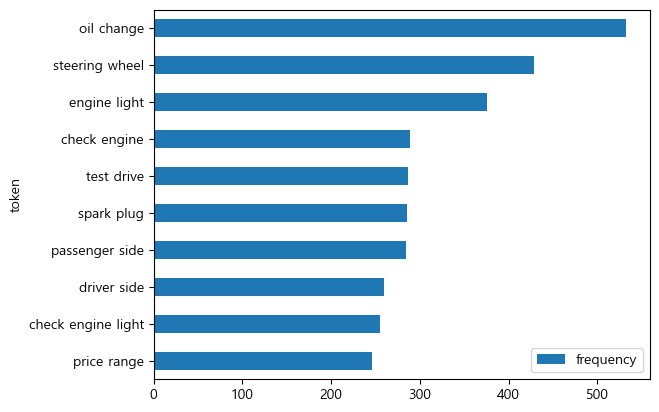

In [134]:
count_words(df, column='noun_phrases').head(10).plot(kind = 'barh').invert_yaxis()

In [135]:
count_words(df, column='noun_phrases')

,frequency
token,
oil change,532
steering wheel,429
engine light,376
check engine,289
test drive,287
...,...
dealer mechanic,2
car nut,2
truck newbie,2


## sqlite 저장

In [141]:
df[nlp_columns] = df[nlp_columns].applymap(lambda items: ' '.join(items))
print(df.columns)
display(df.sample(1))

Index(['id', 'subreddit', 'title', 'raw_text', 'category', 'subcategory',
       'text', 'lemmas', 'adjs_verbs', 'nouns', 'noun_phrases',
       'adj_noun_phrases', 'entities'],
      dtype='object')


,id,subreddit,title,raw_text,category,subcategory,text,lemmas,adjs_verbs,nouns,noun_phrases,adj_noun_phrases,entities
798,8l8ve1,Volkswagen,'09 Jetta Whooshing Noise,"Hi, so I am having an issue with my 2009 Jetta (mk5). Whenever I turn the wheel full lock (nearly always left and sometimes right) I get this really weird what can best be described as a whooshing noise. It only happens when I am in gear as well, if I coast and do this it does not happen. Another thing to note is that this does not happen at higher speeds, anything higher than 15-20mph and it doesn't happen.<lb><lb>Has anyone experienced this before? Or know what it may be? I'm kind of stuck here.<lb><lb>Thanks in advance :)",autos,VW,"'09 Jetta Whooshing Noise: Hi, so I am having an issue with my 2009 Jetta (mk5). Whenever I turn the wheel full lock (nearly always left and sometimes right) I get this really weird what can best be described as a whooshing noise. It only happens when I am in gear as well, if I coast and do this it does not happen. Another thing to note is that this does not happen at higher speeds, anything higher than 15-20mph and it doesn't happen. Has anyone experienced this before? Or know what it may be? I'm kind of stuck here. Thanks in advance :)",0 9 J e t t a W h o o s h i n g N o i s e H i s o b e h a v e i s s u e w i t h 2 0 0 9 J e t t a m k 5 w h e n e v e r t u r n w h e e l f u l l l o c k n e a r l y a l w a y s l e a v e a n d s o m e t i m e s r i g h t g e t r e a l l y w e i r d c a n w e l l b e d e s c r i b e a s w h o o s h i n g n o i s e o n l y h a p p e n w h e n b e i n g e a r a s w e l l i f c o a s t a n d d o d o h a p p e n t h i n g n o t e b e t h a t d o h a p p e n a t h i g h s p e e d h i g h t h a n 1 5 2 0 m p h a n d d o h a p p e n h a v e e x p e r i e n c e b e f o r e o r k n o w m a y b e b e k i n d o f s t u c k h e r e t h a n k i n a d v a n c e,h a v e t u r n l e a v e r i g h t w e i r d d e s c r i b e w h o o s h i n g h a p p e n c o a s t h a p p e n n o t e h a p p e n h i g h h i g h h a p p e n e x p e r i e n c e k n o w s t u c k,J e t t a W h o o s h i n g N o i s e H i i s s u e J e t t a m k 5 w h e e l l o c k n o i s e g e a r t h i n g s p e e d m p h t h a n k a d v a n c e,,f u l l l o c k w h o o s h i n g n o i s e h i g h s p e e d,


In [143]:
con=sqlite3.connect(dir+db_name)
df.to_sql("posts_nlp", con, index=False, if_exists="replace")
con.close()